In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import re

In [3]:
semisup_results_path = "path/to/Results/semisupervised_results/onehot_120M_350M_ridge.csv"
semisup_all_results_path= "path/to/Results/semisupervised_results/onehot_120M_allyears_ridge.csv"
meta_data_path = "path/to/Data/DMS_substitutions.csv"
contiguous_results_path = "../Results/semisupervised_results/chunk_eval_120M_allyears_ridge.csv"
modulo_results_path = "../Results/semisupervised_results/modulo_eval_120M_allyears_ridge_simpleCV.csv"


In [4]:
results_df = pd.read_csv(semisup_results_path)
results_df

,file,10%_train_120M,20%_train_120M,30%_train_120M,40%_train_120M,50%_train_120M,60%_train_120M,70%_train_120M,80%_train_120M,90%_train_120M,...,90%_train_350M,10%_train_onehot,20%_train_onehot,30%_train_onehot,40%_train_onehot,50%_train_onehot,60%_train_onehot,70%_train_onehot,80%_train_onehot,90%_train_onehot
0,A0A192B1T2_9HIV1_Haddox_2018_with_scoresandemb...,0.606016,0.641245,0.657815,0.667852,0.677155,0.688307,0.682781,0.685433,0.682949,...,0.682101,0.658288,0.737720,0.765388,0.775920,0.786495,0.791118,0.795035,0.798085,0.794907
1,A0A1I9GEU1_NEIME_Kennouche_2019_with_scoresand...,0.035785,0.015804,0.028182,0.026843,0.071022,0.024148,0.055637,0.078810,0.023533,...,-0.018506,0.042309,0.067198,0.095118,0.071000,0.082663,0.057563,0.049973,0.147601,0.032153
2,A0A247D711_LISMN_Stadelmann_2021_with_scoresan...,0.359484,0.434729,0.485520,0.505126,0.536811,0.540120,0.543465,0.534963,0.561779,...,0.568002,0.477779,0.565295,0.574489,0.594134,0.621806,0.608434,0.618002,0.605348,0.633886
3,A0A2Z5U3Z0_9INFA_Doud_2016_with_scoresandembed...,0.583427,0.630424,0.654778,0.665888,0.680185,0.679975,0.682813,0.683417,0.684823,...,0.676001,0.585773,0.677669,0.699578,0.717193,0.728469,0.735337,0.736686,0.734841,0.733522
4,A0A2Z5U3Z0_9INFA_Wu_2014_with_scoresandembeddi...,0.172619,0.223359,0.250860,0.249118,0.277014,0.279093,0.286755,0.308471,0.317186,...,0.251930,0.123674,0.172246,0.219912,0.234889,0.272817,0.309246,0.332584,0.330112,0.346749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,VKOR1_HUMAN_Chiasson_2020_activity_with_scores...,0.196944,0.238546,0.301610,0.337993,0.277602,0.299635,0.329884,0.326720,0.317175,...,0.304567,0.127651,0.164233,0.196151,0.241330,0.247236,0.221547,0.251638,0.279157,0.317434
209,VRPI_BPT7_Tsuboyama_2023_2WNM_with_scoresandem...,0.664063,0.750749,0.786451,0.787883,0.802920,0.838818,0.835319,0.839253,0.862233,...,0.809001,0.598722,0.656158,0.705785,0.721380,0.724458,0.736505,0.717994,0.691318,0.717126
210,YAIA_ECOLI_Tsuboyama_2023_2KVT_with_scoresande...,0.728837,0.793209,0.834403,0.851157,0.855061,0.860666,0.881639,0.877153,0.871377,...,0.891795,0.790076,0.839137,0.867027,0.876945,0.879951,0.882813,0.886515,0.895332,0.876131
211,YAP1_HUMAN_Araya_2012_with_scoresandembeddings...,0.649216,0.692861,0.706646,0.716736,0.730010,0.731668,0.740437,0.746153,0.756413,...,0.755270,0.706035,0.749195,0.756944,0.770461,0.778509,0.778835,0.782044,0.788799,0.792655


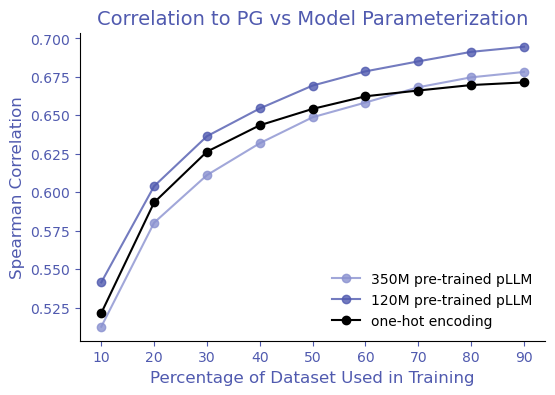

In [5]:
# Define color scheme
base_color = "#505AAF"
lighter_blue = "#8A91D0"
lightest_blue = "#BFC3E7"
black = "#000000"

# === Extract data ===
train_sizes = np.arange(10, 100, 10)  # 10% to 90%

# Extract y values (mean Spearman across datasets)
y_pretrained_lg = [results_df[f"{size}%_train_350M"].mean() for size in train_sizes]
y_pretrained_sm = [results_df[f"{size}%_train_120M"].mean() for size in train_sizes]
y_onehot = [results_df[f"{size}%_train_onehot"].mean() for size in train_sizes]
x_percent = train_sizes

# === Create the plot ===
plt.figure(figsize=(6, 4))

plt.plot(x_percent, y_pretrained_lg, 'o-', label="350M pre-trained pLLM", color=lighter_blue, alpha=0.8)
plt.plot(x_percent, y_pretrained_sm, 'o-', label="120M pre-trained pLLM", color=base_color, alpha=0.8)
plt.plot(x_percent, y_onehot, 'o-', label="one-hot encoding", color=black)

# === Axis formatting ===
plt.xlabel("Percentage of Dataset Used in Training", fontsize=12, color=base_color)
plt.ylabel("Spearman Correlation", fontsize=12, color=base_color)
plt.title("Correlation to PG vs Model Parameterization", fontsize=14, color=base_color)

# === Clean up spines and ticks ===
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', colors=base_color)
ax.tick_params(axis='y', colors=base_color)

# Optionally remove tick labels completely:
# ax.set_xticks([])
# ax.set_yticks([])

# === Legend ===
plt.legend(frameon=False)

# === Save and show ===
plt.savefig("figs/with_one_hot.png", dpi=300, bbox_inches="tight")
plt.show()


In [6]:
all_results_df = pd.read_csv(semisup_all_results_path)

/tmp/ipykernel_30717/2954925696.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Blues", len(years))


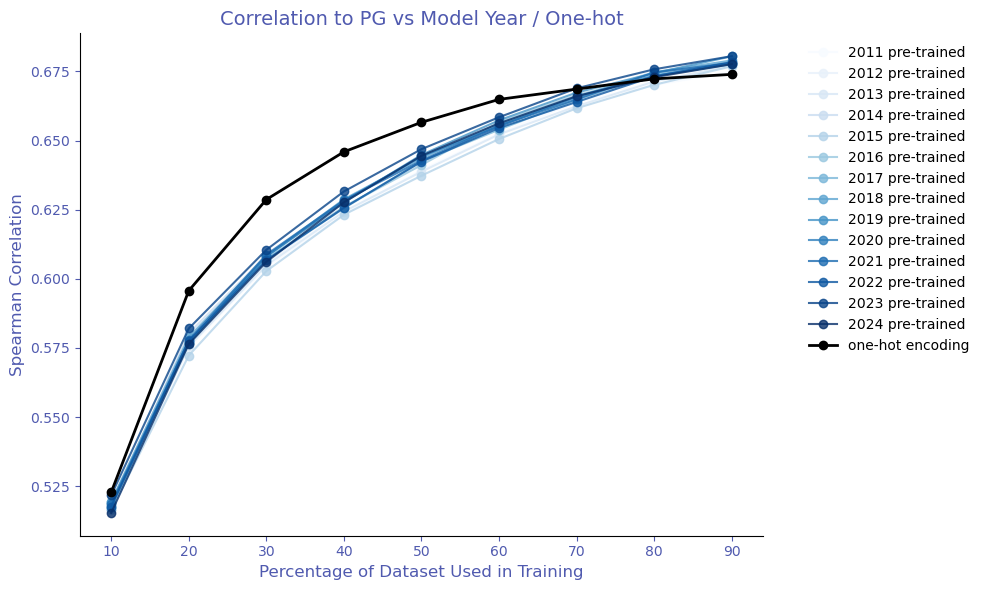

In [7]:

# Define color scheme
base_color = "#505AAF"
black = "#000000"

# === Extract data ===
train_sizes = np.arange(10, 100, 10)  # 10% to 90%
years = list(range(2011, 2025))       # 2011 to 2024

# Create a color map from light to dark blue
cmap = cm.get_cmap("Blues", len(years))
year_colors = {year: cmap(i) for i, year in enumerate(years)}

# Extract y values for each year
y_by_year = {
    year: [all_results_df.get(f"{size}%_train_{year}", np.nan).mean() for size in train_sizes]
    for year in years
}

# Extract y values for one-hot encoding
y_onehot = [all_results_df.get(f"{size}%_train_onehot", np.nan).mean() for size in train_sizes]

# === Create the plot ===
plt.figure(figsize=(10, 6))

# Plot each year with increasing darkness
for year in years:
    plt.plot(train_sizes, y_by_year[year], 'o-', label=f"{year} pre-trained", color=year_colors[year], alpha=0.8)

# Plot one-hot
plt.plot(train_sizes, y_onehot, 'o-', label="one-hot encoding", color=black, linewidth=2)

# === Axis formatting ===
plt.xlabel("Percentage of Dataset Used in Training", fontsize=12, color=base_color)
plt.ylabel("Spearman Correlation", fontsize=12, color=base_color)
plt.title("Correlation to PG vs Model Year / One-hot", fontsize=14, color=base_color)

# === Clean up spines and ticks ===
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', colors=base_color)
ax.tick_params(axis='y', colors=base_color)

# === Legend ===
plt.legend(frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left')


# === Save and show ===
plt.tight_layout()
plt.savefig("figs/year_and_one_hot_summary.png", dpi=300, bbox_inches="tight")
plt.show()

In [8]:
# Split by MDA depth
all_results_df["DMS_id"] = all_results_df["file"].str.replace("_with_scoresandembeddings_allyears.csv", "", regex=False)

#  get rest of PG meta data to merge 
meta_df = pd.read_csv(meta_data_path)
meta_df = meta_df[meta_df["seq_len"]<2048]
merged_df = meta_df.merge(all_results_df, how="inner", on = "DMS_id")


/tmp/ipykernel_30717/1455336263.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Blues", len(years))


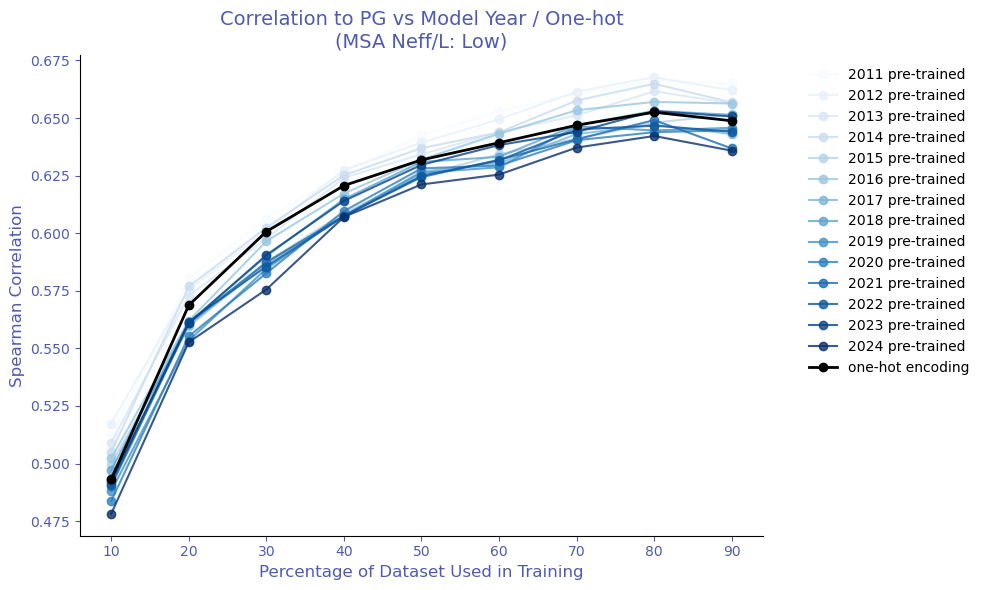

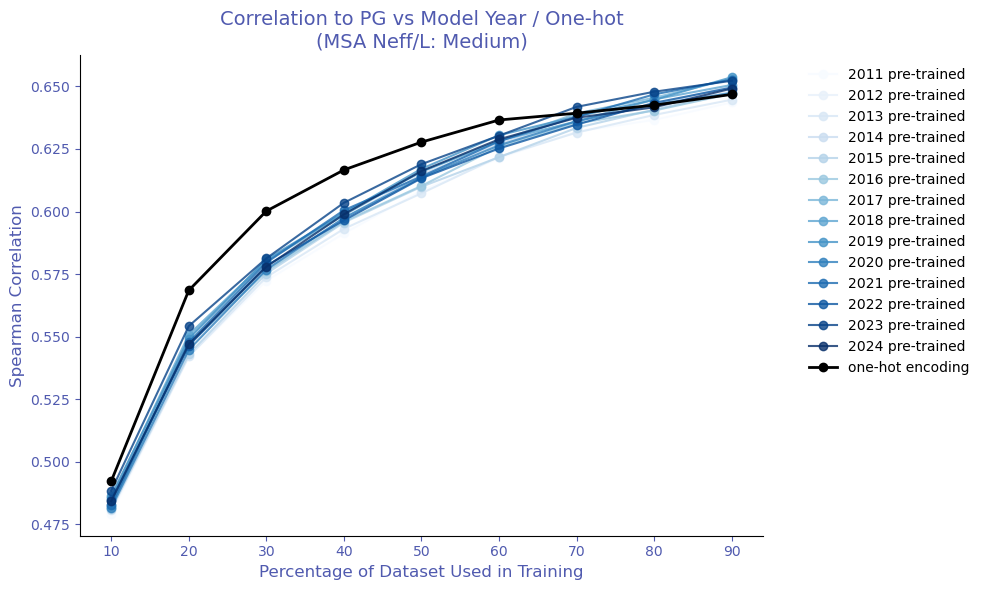

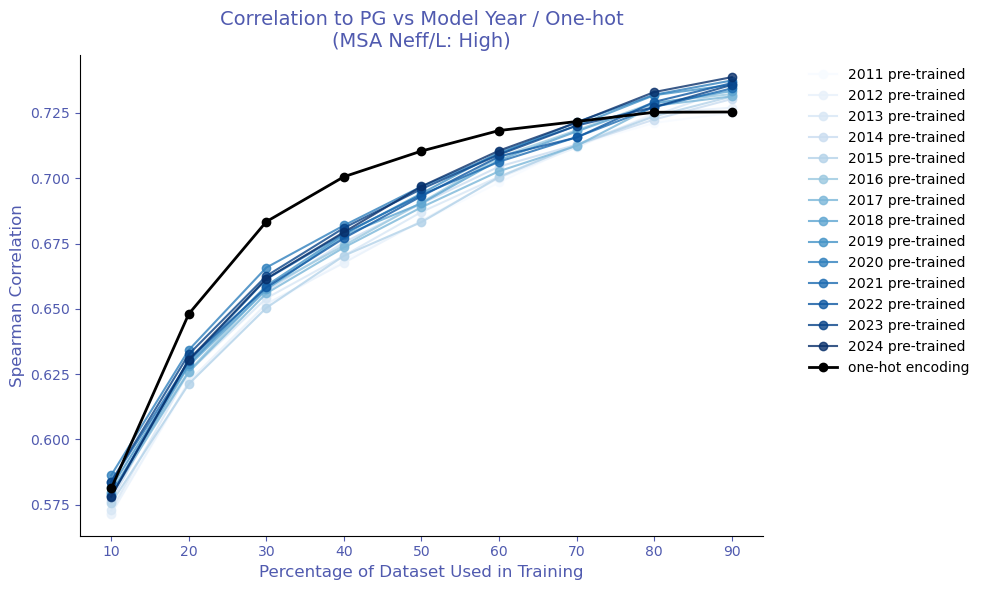

In [9]:

# Define color scheme
base_color = "#505AAF"
black = "#000000"

# Setup parameters
train_sizes = np.arange(10, 100, 10)  # 10% to 90%
years = list(range(2011, 2025))       # 2011 to 2024

# Create a color map from light to dark blue
cmap = cm.get_cmap("Blues", len(years))
year_colors = {year: cmap(i) for i, year in enumerate(years)}

# Loop over each MSA_Neff_L_Category
for category in ["Low", "Medium", "High"]:
    subset_df = merged_df[merged_df["MSA_Neff_L_category"] == category]
    
    # Extract y values for each year
    y_by_year = {
        year: [subset_df.get(f"{size}%_train_{year}", np.nan).mean() for size in train_sizes]
        for year in years
    }

    # Extract y values for one-hot encoding
    y_onehot = [subset_df.get(f"{size}%_train_onehot", np.nan).mean() for size in train_sizes]

    # === Create the plot ===
    plt.figure(figsize=(10, 6))

    for year in years:
        plt.plot(train_sizes, y_by_year[year], 'o-', label=f"{year} pre-trained",
                 color=year_colors[year], alpha=0.8)

    # Plot one-hot
    plt.plot(train_sizes, y_onehot, 'o-', label="one-hot encoding", color=black, linewidth=2)

    # Axis formatting
    plt.xlabel("Percentage of Dataset Used in Training", fontsize=12, color=base_color)
    plt.ylabel("Spearman Correlation", fontsize=12, color=base_color)
    plt.title(f"Correlation to PG vs Model Year / One-hot\n(MSA Neff/L: {category})", fontsize=14, color=base_color)

    # Clean up spines and ticks
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', colors=base_color)
    ax.tick_params(axis='y', colors=base_color)

    # Legend
    plt.legend(frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Save/show
    plt.tight_layout()
    plt.savefig(f"figs/year_and_one_hot_{category}.png", dpi=300, bbox_inches="tight")
    plt.show()

In [ ]:
# Split the protein into chunks and do train/test splits based on that

chunk_results_df = pd.read_csv(contiguous_results_path)
# Need to dedup on file name because the script ran twice
chunk_results_df = chunk_results_df.drop_duplicates()

# Have to drop some nans, which i still dont know why they exist
chunk_results_df = chunk_results_df.dropna()  # Drop any rows with NaNs

# Colors
base_color = "#505AAF"
black = "#000000"

# x-values and years
chunk_counts = [1, 2, 3, 4]
years = list(range(2011, 2025))

# Use updated colormap API to avoid deprecation warning
cmap = plt.colormaps.get_cmap("Blues")
year_colors = {year: cmap(i / len(years)) for i, year in enumerate(years)}


# === Extract y values by year ===
for year in years:
    values = []
    for chunk in chunk_counts:
        col_name = f"{chunk}chunk_train_{year}"
        if col_name in chunk_results_df.columns:
            # Explicitly convert to numeric before taking the mean
            values.append(pd.to_numeric(chunk_results_df[col_name], errors='coerce').to_numpy(dtype=float).mean())
        else:
            values.append(np.nan)
    y_by_year[year] = values

# === One-hot ===
y_onehot = []
for chunk in chunk_counts:
    col_name = f"{chunk}chunk_train_onehot"
    if col_name in chunk_results_df.columns:
        y_onehot.append(pd.to_numeric(chunk_results_df[col_name], errors='coerce').to_numpy(dtype=float).mean())
    else:
        y_onehot.append(np.nan)

# === Create the plot ===
plt.figure(figsize=(, ))

# Plot each year
for year in years:
    plt.plot(chunk_counts, y_by_year[year], 'o-', label=f"{year} pre-trained", color=year_colors[year], alpha=0.8)

# Plot one-hot if available
if any(pd.notna(y_onehot)):
    plt.plot(chunk_counts, y_onehot, 'o-', label="one-hot encoding", color=black, linewidth=2)

# === Axis and title formatting ===
plt.xlabel("Number of Chunks Used in Training", fontsize=12, color=base_color)
plt.ylabel("Spearman Correlation", fontsize=12, color=base_color)
plt.title("", fontsize=14, color=base_color)
plt.xticks(chunk_counts)

# === Styling ===
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', colors=base_color)
ax.tick_params(axis='y', colors=base_color)

# === Legend and layout ===
plt.legend(frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# === Show plot ===
plt.savefig("figs/chunks_vs_year_and_onehot.png", dpi=300, bbox_inches="tight")
plt.show()

/tmp/ipykernel_2045/2995501402.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=melted_df, x="year", y="spearman", palette="Blues", inner="quartile")


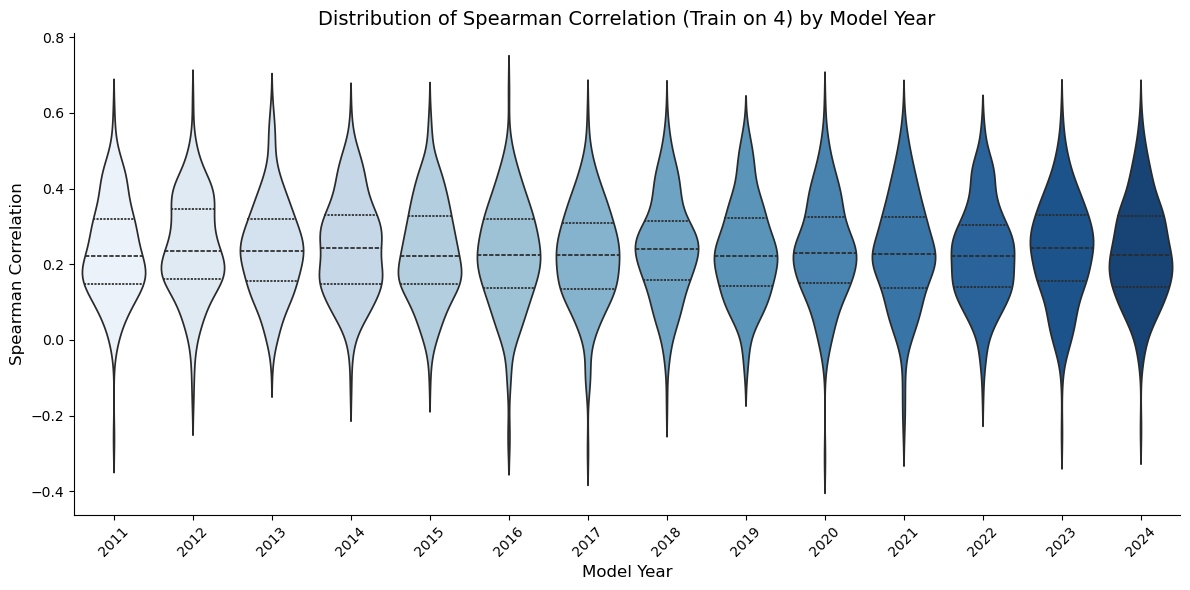

In [49]:
# Now only look at training on 4 chunks and testing on one

# Extract all columns for chunk 4
chunk = 4
chunk4_cols = [col for col in chunk_results_df.columns if col.startswith(f"{chunk}chunk_train_") and not col.endswith("onehot")]

# Create a melted DataFrame: columns = [value, year]
melted_df = pd.DataFrame()

for col in chunk4_cols:
    year = col.split("_")[-1]
    values = pd.to_numeric(chunk_results_df[col], errors='coerce')
    temp_df = pd.DataFrame({"year": int(year), "spearman": values})
    melted_df = pd.concat([melted_df, temp_df], ignore_index=True)

# Remove any rows with NaNs
melted_df = melted_df.dropna()

# Plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=melted_df, x="year", y="spearman", palette="Blues", inner="quartile")

# Style
plt.title("Distribution of Spearman Correlation (Train on 4) by Model Year", fontsize=14)
plt.xlabel("Model Year", fontsize=12)
plt.ylabel("Spearman Correlation", fontsize=12)
plt.xticks(rotation=45)
sns.despine()

plt.tight_layout()
plt.show()



In [3]:
df_5cv = pd.read_csv(modulo_results_path)
df_5cv

,file,cv5_onehot,cv5_2011,cv5_2012,cv5_2013,cv5_2014,cv5_2015,cv5_2016,cv5_2017,cv5_2018,cv5_2019,cv5_2020,cv5_2021,cv5_2022,cv5_2023,cv5_2024
0,A0A192B1T2_9HIV1_Haddox_2018_with_scoresandemb...,-0.005773,0.464037,0.518520,0.525091,0.516223,0.539567,0.527980,0.524638,0.525660,0.531333,0.487994,0.492509,0.481120,0.542982,0.516490
1,A0A1I9GEU1_NEIME_Kennouche_2019_with_scoresand...,-0.015228,0.057317,0.001109,0.027316,0.029372,0.025698,0.078019,0.025318,0.074280,0.033166,-0.019672,0.050929,0.069780,-0.061449,0.070827
2,A0A247D711_LISMN_Stadelmann_2021_with_scoresan...,0.057740,0.107724,0.220642,0.256119,0.155124,0.256126,0.209320,0.153579,0.217625,0.176045,0.198197,0.202045,0.170333,0.202149,0.090061
3,A0A2Z5U3Z0_9INFA_Doud_2016_with_scoresandembed...,0.006533,0.438187,0.470115,0.414203,0.498365,0.394784,0.456967,0.393825,0.450663,0.495604,0.378486,0.440288,0.459338,0.442645,0.448478
4,A0A2Z5U3Z0_9INFA_Wu_2014_with_scoresandembeddi...,0.028752,0.135196,0.198450,0.197026,0.168214,0.125111,0.188421,0.205212,0.193094,0.195260,0.142774,0.209739,0.169161,0.199200,0.225196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,VKOR1_HUMAN_Chiasson_2020_activity_with_scores...,-0.015438,0.158012,0.022480,0.202396,0.235903,0.195039,0.181662,0.151834,0.112396,0.217829,0.153066,0.179359,0.046377,0.177220,0.212133
207,VRPI_BPT7_Tsuboyama_2023_2WNM_with_scoresandem...,-0.001538,0.511431,0.425101,0.284150,0.485307,0.461484,0.457574,0.410401,0.458768,0.421847,0.508151,0.427540,0.546272,0.534474,0.383952
208,YAIA_ECOLI_Tsuboyama_2023_2KVT_with_scoresande...,-0.024463,0.193745,0.308956,0.315908,0.158222,0.107541,0.215619,0.333313,0.338487,0.289866,0.305338,0.163941,0.308128,0.144531,0.197357
209,YAP1_HUMAN_Araya_2012_with_scoresandembeddings...,-0.178582,0.388490,0.288700,0.196520,0.084255,0.214331,0.197735,0.245655,0.397447,0.465605,0.313806,0.154824,0.053034,0.153072,0.046233


/tmp/ipykernel_13828/1846737601.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=melted,


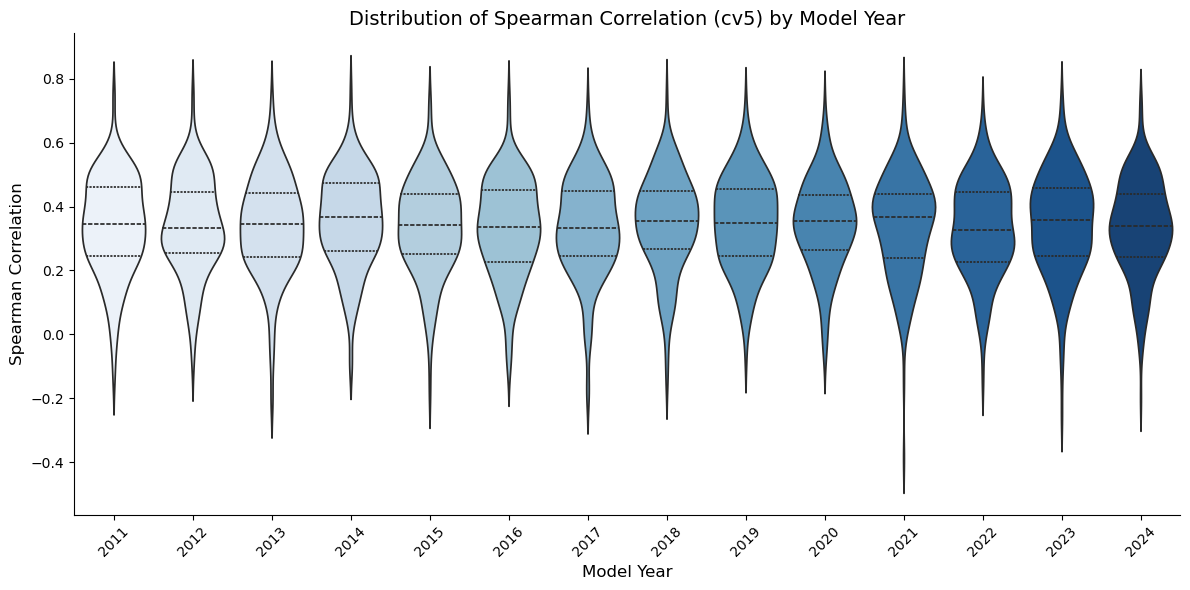

In [7]:
year_cols = [c for c in df_5cv.columns
             if re.fullmatch(r"cv5_\d{4}", c)]          # e.g. cv5_2011

melted = (
    df_5cv
      .melt(value_vars=year_cols, var_name="col", value_name="spearman")
      .dropna(subset=["spearman"])                      # drop NaNs
)

# extract the 4-digit year from the column name and cast to int
melted["year"] = melted["col"].str.extract(r"(\d{4})").astype(int)

# optional: sort years so x-axis is left→right chronologically
melted = melted.sort_values("year")

# --- 3. plot ---------------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.violinplot(data=melted,
               x="year", y="spearman",
               palette="Blues", inner="quartile")

plt.title("Distribution of Spearman Correlation (cv5) by Model Year",
          fontsize=14)
plt.xlabel("Model Year", fontsize=12)
plt.ylabel("Spearman Correlation", fontsize=12)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
year_cols = [c for c in df_5cv.columns
             if re.fullmatch(r"cv5_\d{4}", c)]          # e.g. cv5_2011 …

# Extract and sort the numeric years so the x-axis is chronological
years = sorted(int(c.split("_")[1]) for c in year_cols)
year_cols = [f"cv5_{y}" for y in years]                 # reordered cols

plt.figure(figsize=(10, 6))

cmap = cm.get_cmap("Blues", df_5cv.shape[0])

for idx, (_, row) in enumerate(df_5cv.iterrows()):
    plt.plot(
        years,
        row[year_cols],
        "o-",
        color=cmap(idx),
        alpha=0.7,
        linewidth=1.5,
        label=row["file"] if idx < 10 else None   # only first few labels
    )


onehot_val = df_5cv["cv5_onehot"].mean()            # or .median()
plt.axhline(onehot_val,
            color=black, linestyle="--", linewidth=2,
            label="one-hot encoding")


plt.xlabel("Model Year",  fontsize=12, color=base_color)
plt.ylabel("Spearman Correlation", fontsize=12, color=base_color)
plt.title("Spearman Correlation vs Model Year (cv5)", fontsize=14,
          color=base_color)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis="x", colors=base_color, rotation=45)
ax.tick_params(axis="y", colors=base_color)

plt.tight_layout()
#plt.savefig("figs/spearman_by_year.png", dpi=300, bbox_inches="tight")
plt.show()